In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
len(df)

7043

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Transpose

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
total_charges = pd.to_numeric(df.TotalCharges, errors='coerce') # errors is there to raise exception when it sees non-numeric data
df[total_charges.isnull()][['customerID', 'TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [8]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') 
df.TotalCharges = df.TotalCharges.fillna(0)

In [9]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

string_columns

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [10]:
# to make all the columns start with a lower letter
df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')
  

In [11]:
df.churn = (df.churn == 'yes').astype(int)

In [12]:
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)  # he train_test_split function can split the data into two parts: 

In [13]:
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

y_train = df_train.churn.values
y_val = df_val.churn.values

del df_train['churn']
del df_val['churn']

In [14]:
df_train_full.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [15]:
df_train_full.churn.value_counts()

churn
0    4113
1    1521
Name: count, dtype: int64

In [16]:
global_mean = df_train_full.churn.mean()
round(global_mean, 3)

0.27

In [17]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 
 'phoneservice', 'multiplelines', 'internetservice', 
 'onlinesecurity', 'onlinebackup', 'deviceprotection', 
 'techsupport', 'streamingtv', 'streamingmovies', 
 'contract', 'paperlessbilling', 'paymentmethod'
]

numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [18]:
df_train_full[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [19]:
female_mean = df_train_full[df_train_full.gender == 'female'].churn.mean()
male_mean = df_train_full[df_train_full.gender == 'male'].churn.mean()

In [20]:
partner_yes = df_train_full[df_train_full.partner == 'yes'].churn.mean()
print('partner == yes', round(partner_yes, 3))

partner_no = df_train_full[df_train_full.partner == 'no'].churn.mean()
print('partner == no :', round(partner_no, 3))

partner == yes 0.205
partner == no : 0.33


In [21]:
df_group = df_train_full.groupby(by='gender').churn.agg(['mean'])
df_group['diff'] = df_group['mean'] - global_mean
df_group['risk'] = df_group['mean'] / global_mean
df_group

,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


In [22]:
# Let's find the risk for all categorical values
from IPython.display import display

for col in categorical:
  df_group = df_train_full.groupby(by=col).churn.agg(['mean'])
  df_group['diff'] = df_group['mean'] - global_mean
  df_group['risk'] = df_group['mean'] / global_mean
  display(df_group)


,mean,diff,risk
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,risk
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,risk
partner,,,
no,0.329809,0.059841,1.221659
yes,0.205033,-0.064935,0.759472


,mean,diff,risk
dependents,,,
no,0.313760,0.043792,1.162212
yes,0.165666,-0.104302,0.613651


,mean,diff,risk
phoneservice,,,
no,0.241316,-0.028652,0.893870
yes,0.273049,0.003081,1.011412


,mean,diff,risk
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,risk
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,risk
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,risk
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,risk
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,risk
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,risk
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,risk
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,risk
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,risk
paperlessbilling,,,
no,0.172071,-0.097897,0.637375
yes,0.338151,0.068183,1.252560


,mean,diff,risk
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


In [23]:
from sklearn.metrics import mutual_info_score

def calculate_mi(series):
  return mutual_info_score(series, df_train_full.churn)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi


,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [24]:
# To check for correlation
df_train_full[numerical].corrwith(df_train_full.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [25]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'two_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'bank_transfer_(automatic)',
  'tenure': 71,
  'monthlycharges': 86.1,
  'totalcharges': 6045.9},
 {'gender': 'female',
  'seniorcitizen': 1,
  'partner': 'yes',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'yes',
  'internetservice': 'fiber_optic',
  'onlinesecurity': 'no',
  'onlinebackup': 'no',
  'deviceprotection': 'yes',
  'techsupport': 'no',
  'streamingtv': 'yes',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'yes',
  'paymentmethod': 'credit_card_(automatic)',
  'tenure': 60,
  'monthlycharges': 100.5,
  'totalcharges': 6029.0},
 {'gender':

In [26]:
# We Use DictVectorizer in Scikit-Learn to perform one-hot encoding

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [27]:
X_train = dv.transform(train_dict)
X_train[0]

array([0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 8.6100e+01, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 7.1000e+01, 6.0459e+03])

In [28]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [30]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [31]:
y_pred = model.predict_proba(X_val)
y_pred

array([[0.76508893, 0.23491107],
       [0.7311339 , 0.2688661 ],
       [0.6805482 , 0.3194518 ],
       ...,
       [0.94274725, 0.05725275],
       [0.38476961, 0.61523039],
       [0.93872737, 0.06127263]])

In [32]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.23491107, 0.2688661 , 0.3194518 , ..., 0.05725275, 0.61523039,
       0.06127263])

In [33]:
churn = y_pred >= 0.5

# To measure accuracy
(y_val == churn).mean()

0.8016129032258065

In [34]:
# To see which feature is associated with each weight
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.563,
 'contract=one_year': -0.086,
 'contract=two_year': -0.599,
 'dependents=no': -0.03,
 'dependents=yes': -0.092,
 'deviceprotection=no': 0.1,
 'deviceprotection=no_internet_service': -0.116,
 'deviceprotection=yes': -0.106,
 'gender=female': -0.027,
 'gender=male': -0.095,
 'internetservice=dsl': -0.323,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.116,
 'monthlycharges': 0.001,
 'multiplelines=no': -0.168,
 'multiplelines=no_phone_service': 0.127,
 'multiplelines=yes': -0.081,
 'onlinebackup=no': 0.136,
 'onlinebackup=no_internet_service': -0.116,
 'onlinebackup=yes': -0.142,
 'onlinesecurity=no': 0.258,
 'onlinesecurity=no_internet_service': -0.116,
 'onlinesecurity=yes': -0.264,
 'paperlessbilling=no': -0.213,
 'paperlessbilling=yes': 0.091,
 'partner=no': -0.048,
 'partner=yes': -0.074,
 'paymentmethod=bank_transfer_(automatic)': -0.027,
 'paymentmethod=credit_card_(automatic)': -0.136,
 'paymentmethod=electronic_check': 0.175,


In [35]:
# Testing our model

customer1 = { 
 'customerid': '8879-zkjof', 
 'gender': 'female', 
 'seniorcitizen': 0, 
 'partner': 'no', 
 'dependents': 'no', 
 'tenure': 41, 
 'phoneservice': 'yes', 
 'multiplelines': 'no', 
 'internetservice': 'dsl', 
 'onlinesecurity': 'yes', 
 'onlinebackup': 'no', 
 'deviceprotection': 'yes', 
 'techsupport': 'yes', 
 'streamingtv': 'yes', 
 'streamingmovies': 'yes',
  'contract': 'one_year', 
 'paperlessbilling': 'yes', 
 'paymentmethod': 'bank_transfer_(automatic)', 
 'monthlycharges': 79.85, 
 'totalcharges': 3320.75, 
}

customer2 = { 
 'gender': 'female', 
 'seniorcitizen': 1, 
 'partner': 'no', 
 'dependents': 'no', 
 'phoneservice': 'yes', 
 'multiplelines': 'yes', 
 'internetservice': 'fiber_optic', 
 'onlinesecurity': 'no', 
 'onlinebackup': 'no', 
 'deviceprotection': 'no', 
 'techsupport': 'no', 
 'streamingtv': 'yes', 
 'streamingmovies': 'no', 
 'contract': 'month-to-month', 
 'paperlessbilling': 'yes', 
 'paymentmethod': 'electronic_check', 
 'tenure': 1, 
 'monthlycharges': 85.7, 
 'totalcharges': 85.7 
}


In [36]:
X_test = dv.transform([customer1])
X_test

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 7.98500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 4.10000e+01, 3.32075e+03]])

In [37]:
model.predict_proba(X_test) 


array([[0.92667761, 0.07332239]])

In [38]:
#  Probability for churnig for a member in the first row and second column.
model.predict_proba(X_test)[0, 1] 

0.07332239057816664

In [39]:
X_test2 = dv.transform([customer2])
model.predict_proba(X_test2)[0, 1]

# The output of the model is 83% likelihood of churn. So we should send this client a 
# promotional mail in the hope of retaining her.


0.8321649550627843

In [40]:
y_pred = model.predict_proba(X_val)[:, 1]
churn = y_pred >= 0.5
(churn == y_val).mean()

0.8016129032258065

In [41]:
# USe sklearn accurcy
from sklearn.metrics import accuracy_score

thresholds = np.linspace(0, 1, 11)    #Create an array with different thresholds: 0.0, 0.1, 0.2, etc. 

for t in thresholds:
  churn = y_pred >= t
  acc = accuracy_score(y_val, churn)   #Use the accuracy_score function from scikit-learn for computing accuracy
  print('%0.2f %0.3f' % (t, acc))


0.00 0.261
0.10 0.595
0.20 0.690
0.30 0.755
0.40 0.782
0.50 0.802
0.60 0.790
0.70 0.774
0.80 0.742
0.90 0.739
1.00 0.739


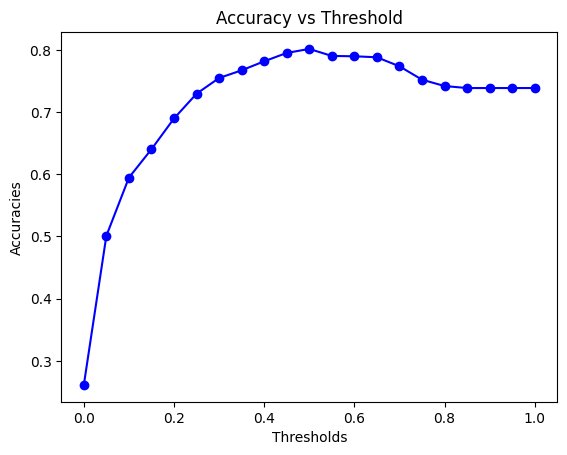

In [42]:
thresholds = np.linspace(0, 1, 21)

accuracies = []

for t in thresholds:
  churn = y_pred >= t
  acc = accuracy_score(y_val, churn)
  accuracies.append(acc)


# Add labels and title
plt.xlabel('Thresholds')
plt.ylabel('Accuracies')
plt.title('Accuracy vs Threshold')
plt.plot(thresholds, accuracies, marker='o', linestyle='-', color='b')

plt.show()

In [43]:
# Let's create baseline prediction
size_val = len(y_val)  # Get the number of customers in the validation set. 
baseline = np.repeat(False, size_val)  # Create an array with only False elements. 

accuracy_score(baseline, y_val)



0.7387096774193549

In [44]:
t = 0.5
predict_churn = (y_pred >= t)
predict_no_churn = (y_pred < t)

actual_churn = (y_val == 1)
actual_no_churn = (y_val == 0)

true_positive = (predict_churn & actual_churn).sum()
false_positive = (predict_churn & actual_no_churn).sum()

false_negative = (predict_no_churn & actual_churn).sum()
true_negative = (predict_no_churn & actual_no_churn).sum()

confusion_table = np.array(
  [[true_negative, false_positive],
   [false_negative, true_positive]]
)

confusion_table / confusion_table.sum()

accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_negative + false_positive)
accuracy

0.8016129032258065

In [45]:
Precision = true_positive / (true_positive + false_positive)   #The precision of a model tells us how many of the positive 
# predictions turned out to be correct.
Precision

# Recall is the fraction of correctly classified positive examples among all positive examples. 
Recall = true_positive / (true_positive + false_negative)
Recall

0.5946502057613169

In [46]:
# ROC curve and AUC score

# ROC stands for "receiver operating characteristic"
scores = []

thresholds = np.linspace(0, 1, 101)  

for t in thresholds:
  tp = ((y_pred >= t) & (y_val == 1)).sum()
  fp = ((y_pred >= t) & (y_val == 0)).sum()
  fn = ((y_pred < t) & (y_val == 1)).sum()
  tn = ((y_pred < t) & (y_val == 0)).sum()
  scores.append((t, tp, fp, fn, tn))

  # CONVERT turples to data
  df_scores = pd.DataFrame(scores)
  df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
  print(df_scores[::10])

  

   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
   threshold   tp    fp  fn  tn
0        0.0  486  1374   0   0
    threshold   tp    fp  fn   tn
0         0.0  486  1374   0    0
10        0.1  458   726  28  648
    threshold   tp    fp  fn   tn
0         0.0  486  1374   0    0
10        0.1  458   726  28  648
    threshold   tp    fp  fn   tn
0         0.0  486  1374   0    0
10        0.1  458   726  28  648
    threshold   tp    fp  fn   tn
0         0.0  486  

In [47]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) 
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn) 

In [48]:
print(df_scores[::10])

     threshold   tp    fp   fn    tn       tpr       fpr
0          0.0  486  1374    0     0  1.000000  1.000000
10         0.1  458   726   28   648  0.942387  0.528384
20         0.2  421   512   65   862  0.866255  0.372635
30         0.3  380   350  106  1024  0.781893  0.254731
40         0.4  337   257  149  1117  0.693416  0.187045
50         0.5  289   172  197  1202  0.594650  0.125182
60         0.6  200   105  286  1269  0.411523  0.076419
70         0.7   99    34  387  1340  0.203704  0.024745
80         0.8    7     1  479  1373  0.014403  0.000728
90         0.9    0     0  486  1374  0.000000  0.000000
100        1.0    0     0  486  1374  0.000000  0.000000


In [49]:
# A random model outputs a random score between 0 and 1 regardless of the input.

np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [50]:
# Function for calculating TPR and FPR at different threholds

def tpr_fpr_dataframe(y_val, y_pred):
  scores = []

  thresholds = np.linspace(0, 1, 101)

  for t in thresholds:
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)

  df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

  df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn) 
  df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn) 
  return df_scores 



In [51]:
# Now let’s use this function to calculate the TPR and FPR for the random model
df_rand = tpr_fpr_dataframe(y_val, y_rand)

np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))
df_rand = tpr_fpr_dataframe(y_val, y_rand)
df[::10]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
10,9763-grskd,male,0,yes,yes,13,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,49.95,587.45,0
20,8779-qrdmv,male,1,no,no,1,no,no_phone_service,dsl,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,39.65,39.65,1
30,3841-nfecx,female,1,yes,no,71,yes,yes,fiber_optic,yes,...,yes,yes,no,no,two_year,yes,credit_card_(automatic),96.35,6766.95,0
40,8865-tnmnx,male,0,yes,yes,10,yes,no,dsl,no,...,no,no,no,no,one_year,no,mailed_check,49.55,475.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000,0052-ynyot,female,0,no,no,67,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,no,electronic_check,20.55,1343.40,0
7010,0723-drclg,female,1,yes,no,1,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,74.45,74.45,1
7020,9837-fwlch,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,electronic_check,19.20,239.00,0
7030,0871-opbxw,female,0,no,no,2,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,mailed_check,20.05,39.25,0


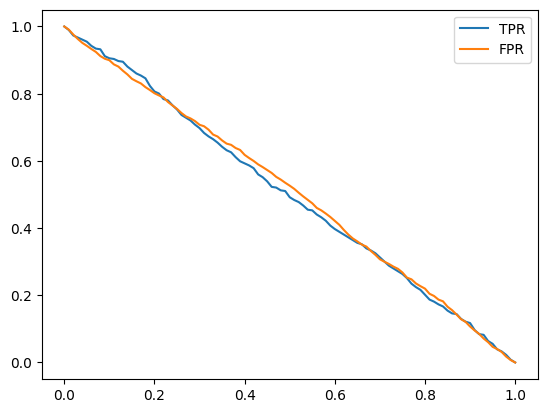

In [52]:
plt.plot(df_rand.threshold, df_rand.tpr, label='TPR') 
plt.plot(df_rand.threshold, df_rand.fpr, label='FPR') 
plt.legend() 


In [53]:
# To calculate the AUC for our models, we can use auc.
from sklearn.metrics import auc
auc(df_scores.fpr, df_scores.tpr)


0.8359001084215382

In [55]:
# If all we need is the AUC, we don’t need to compute the ROC curve first. We can take a 
# shortcut and use a function from Scikit-Learn that takes care of everything and simply returns 
# the AUC of our model:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_val, y_pred)

0.8363396349608545

In [68]:
# Finding the best paarmeeter
def train(df, y, C): 
  cat = df[categorical + numerical].to_dict(orient='records') #A 
  
  dv = DictVectorizer(sparse=False) #A 
  dv.fit(cat) #A 

  X = dv.transform(cat) #A 

  model = LogisticRegression(solver='liblinear', C=C) #B 
  model.fit(X, y) #B 
  return dv, model 

In [65]:
def predict(df, dv, model): 
  cat = df[categorical + numerical].to_dict(orient='records') #A 
  X = dv.transform(cat) #A 
  y_pred = model.predict_proba(X)[:, 1] #B 
  return y_pred

In [73]:
# Implement the K-fold cross-validation
from sklearn.model_selection import KFold

nfolds = 10

kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.001, 0.01, 0.1, 0.5, 1, 10]:
  aucs = []

  for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx].reset_index(drop=True)
    df_val = df_train_full.iloc[val_idx].reset_index(drop=True)

    y_train = df_train.churn.values
    y_val = df_val.churn.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    aucs.append(auc) 

  print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.001, auc = 0.826 ± 0.016
C=0.01, auc = 0.840 ± 0.012
C=0.1, auc = 0.842 ± 0.012
C=0.5, auc = 0.842 ± 0.012
C=1, auc = 0.842 ± 0.012
C=10, auc = 0.842 ± 0.012


In [67]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))  

auc = 0.842 ± 0.012


In [74]:
# Now we need to do the last step: train the model on the entire train and validation 
# datasets and apply it to the test dataset to verify it indeed works well.

y_train = df_train_full.churn.values
y_test = df_test.churn.values

dv, model = train(df_train_full, y_train, C=0.5)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
print('auc = %.3f' % auc)

auc = 0.858
